# Linear Regression
Linear regression a way to measure the relationship between a dependent variable (target) and one or more independent variables (explanatory). 
    - Simple Linear Regression: One independent variable
    - Multiple Linear Regression: More than one independent variable

There are assumptions that the data must satisfy before fitting a linear regression model:  

__Assumptions__
    * Linear Relationship
    * Multivariate Normality
    * No or little multicollinearity
    * Homoscedastic
    * Rule of thumb: Sample size $\geq$ 20  
If the assumpotions are violated, the results of LR could potentially be misleading or biased.

__Equation__
Linear regressios is best represented by the following equation:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$  
where $\beta_0$: intercept, $\beta_i$: coefficient of variable $x_i$, $n$ is the number of variables






WIP  
heteroscedastic : Error terms do not have a constant variance
Model

Validation



### Import Dependencies

In [2]:
# Libraries
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import probplot

# Dataset
raw_dataset = load_diabetes()

# To view attributes of boston dataset
# boston_datasetdata.keys()

data = pd.DataFrame(raw_dataset['data'], columns = raw_dataset['feature_names'])
data['diab'] = raw_dataset.target

display(data.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diab
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Asumptions: Linear Relationship

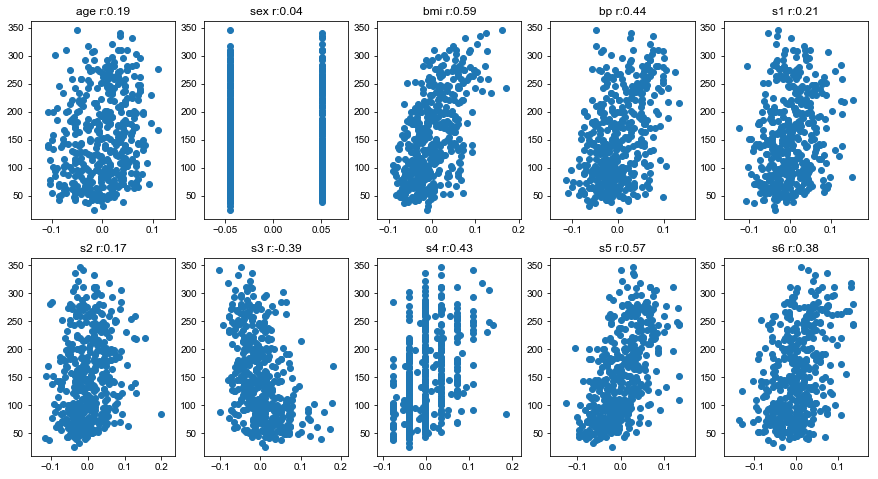

In [3]:
# Graphical Representation
figure, axis = plt.subplots(2,5, figsize=(15,8))

# Config
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

index = 0
for i in range(2):
    for j in range(5):
        r = round(np.corrcoef(data[data.columns[index]], data.diab)[0][1],2)
        axis[i,j].set_title(data.columns[index] + ' r:{}'.format(r)) 
        axis[i,j].scatter(data[data.columns[index]],data[data.columns[-1]])
        index += 1
        

"""
Note:
Pearson Correlation Coefficient (r) ranges from [-1,1] (inclusively)
if r = 1, there is a strong positive correlation 
if r = -1, there is a strong negative correlation
if r = 0, there is no correlation

Below, it is evident that there is not a real strong relationship between the explanatory variables and the target

There is a weak linear linear relationship to the target 
We will assume for now that the assumption is met
""";

### Assumptions: Multivariate Normality
Normality of each variable can tested and visually represented using the following:
* Shapiro-Wilk Test
* Anderson Test
* Q-Q Plot (Quantile-Quantile Plot)
* Histogram

Shapiro Hypothesis Test  
$H_0:$ The sample belongs to a normal distribution  
$H_1:$ The sample does not belong to a normal distribution  
Reject $H_0$ if p-value < .05

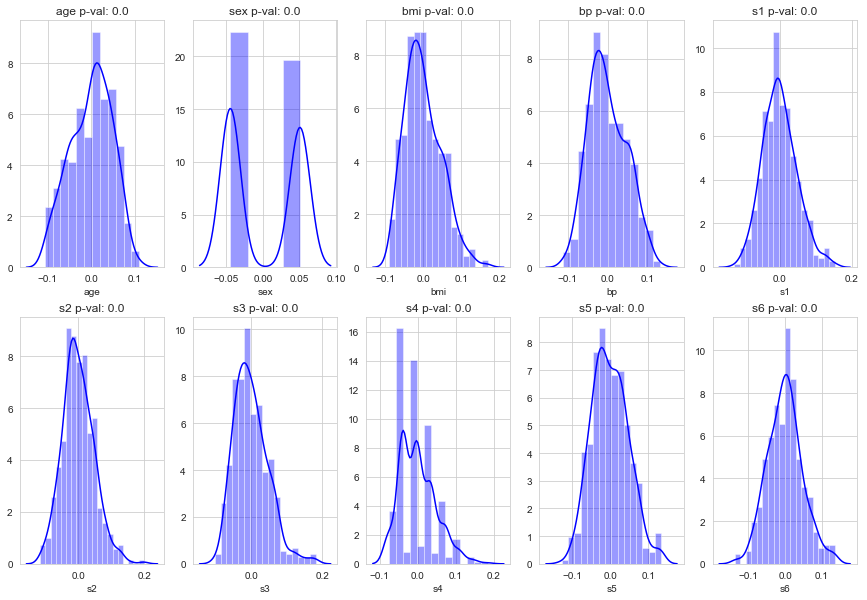

In [4]:
# Histogram W/ Shapiro Wilk
figure, axis = plt.subplots(2,5, figsize=(15,10))

# Config
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

index = 0
for i in range(2):
    for j in range(5):
        p_value = round(shapiro(data[data.columns[i]])[1],4)
        axis[i,j].set_title(data.columns[index] + ' p-val: {}'.format(p_value)) 
        sns.distplot(data[data.columns[index]], kde = True, rug = False, color = 'blue', bins = None, hist = True, ax = axis[i,j]);
        index += 1
        

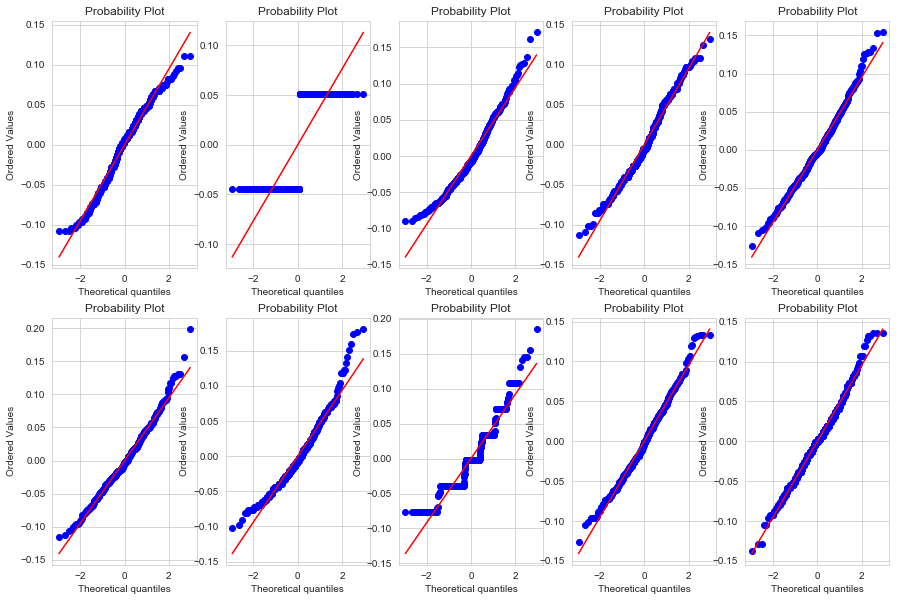

In [5]:
# QQ Plots W/ Shapiro Wilk
figure, axis = plt.subplots(2,5, figsize=(15,10))

# Config
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

index = 0
for i in range(2):
    for j in range(5):

        probplot(data[data.columns[index]], dist="norm", plot=axis[i,j]);
        index += 1
        

### Asumptions: Multicollinearity
One method to test multicollinearity is using Variance Inflation Factors (VIF)  
VIF identifies correlation between independent variables and the strength of that correlation
VIF of 1 indicates that there is no correlation between this independent variable and any others  
VIF between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures  
VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable  

$ VIF = \frac{1}{1-R^2}$  
Click [here]([https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis) for a more detail description

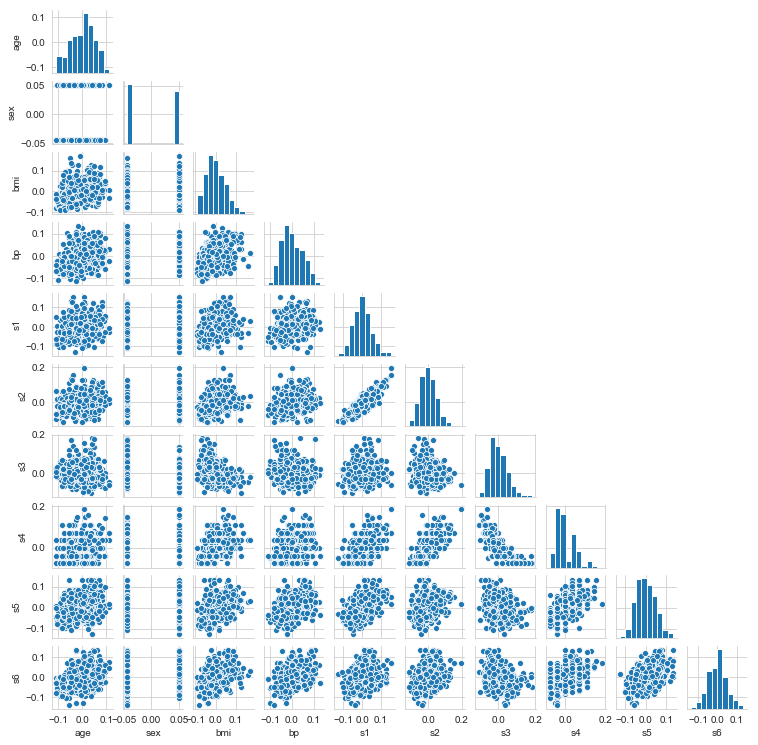

In [10]:
# Pairplot Before VIF
g=sns.pairplot(data.drop(['diab'],axis = 1))
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.fig.set_size_inches(10,10)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# Defining VIF
def calculate_vif(X, thresh=8.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [8]:
new_data = calculate_vif(data.drop(['diab'],axis = 1))

dropping 's1' at index: 4
Remaining variables:
Index(['age', 'sex', 'bmi', 'bp', 's2', 's3', 's4', 's5', 's6'], dtype='object')


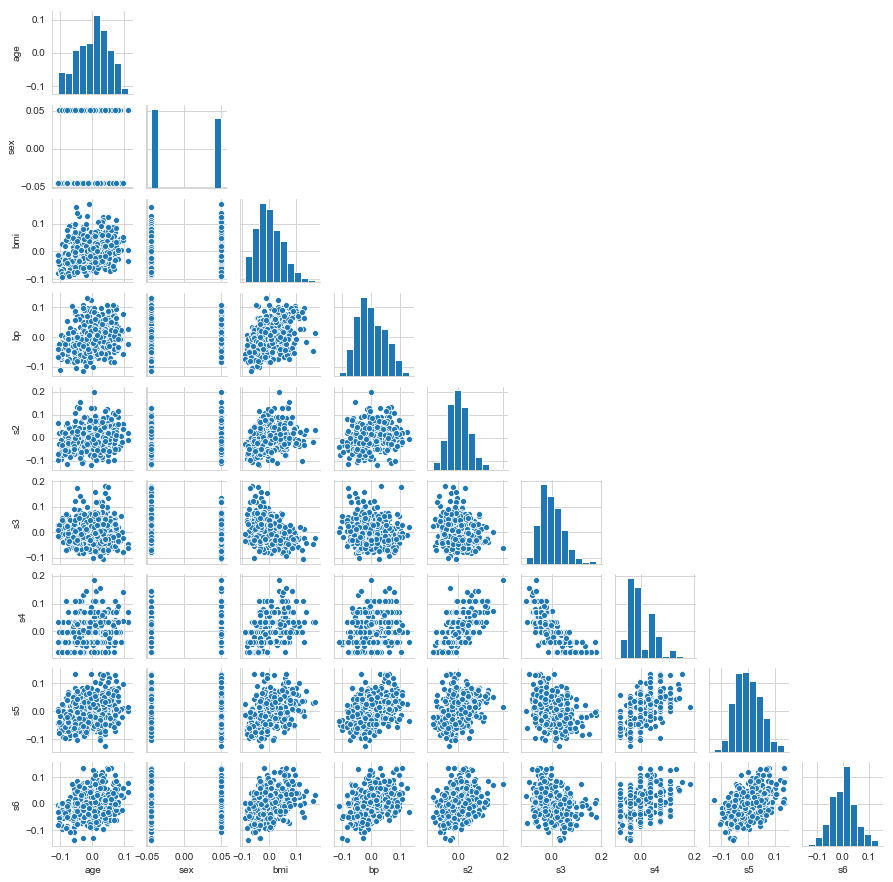

In [11]:
# Pairplot After VIF
g=sns.pairplot(new_data)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.fig.set_size_inches(12,12)

### Linear Regression Shuffle, Random Sample

In [169]:
from sklearn.linear_model import LinearRegression
from random import shuffle

# Setting Seed
np.random.seed(1)

# Random Sampling 75/25 Split
row_index = list(range(new_data.shape[0]))
shuffle(row_index)
threshold = round(len(row_index) * .75)
train_index = row_index[0:threshold] 
test_index = row_index[threshold:]

# Test Train Data
X,y = new_data, data.diab
X_train,y_train = X.iloc[train_index], y.iloc[train_index]
X_test,y_test = X.iloc[test_index],y.iloc[test_index]

# Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

# Mean Absolute Error
MAE = round(np.mean(np.abs(np.array(y_test) - np.array(preds))),3)

# Root Mean Squared Error
RMSE = round(np.mean((np.array(y_test) - np.array(preds)) ** 2),3)

# Mean Absolute Percentage Error
MAPE =  round(np.mean(np.abs(np.array(y_test) - np.array(preds))/np.array(y_test)),3)

# R-squared
r_squared = round(r2_score(y_test,preds),3)

print("""
Summary
-------
MAE: {} (Mean Absolute Error)
RMSE: {} (Root Mean Squared Error)
MAPE: {} (Mean Absolute Percentage Error)
r_squared: {} (Goodness of fit)
""".format(*[MAE,RMSE,MAPE,r_squared]))


Summary
-------
MAE: 45.041 (Mean Absolute Error)
RMSE: 3092.632 (Root Mean Squared Error)
MAPE: 0.383 (Mean Absolute Percentage Error)
r_squared: 0.483 (Goodness of fit)



### Homoscedasticity
Homoscedasticity refers the the constant error variance across the finite space.  
In order to test for Homoscedasticity, you need to apply either Breusch–Pagan test or Barltlett's test  
It is also possible to see the variance change when plotting Residuals vs Fitted  
Click [here](https://www.r-bloggers.com/model-validation-interpreting-residual-plots/) for a deeper dive to homoscedasticity

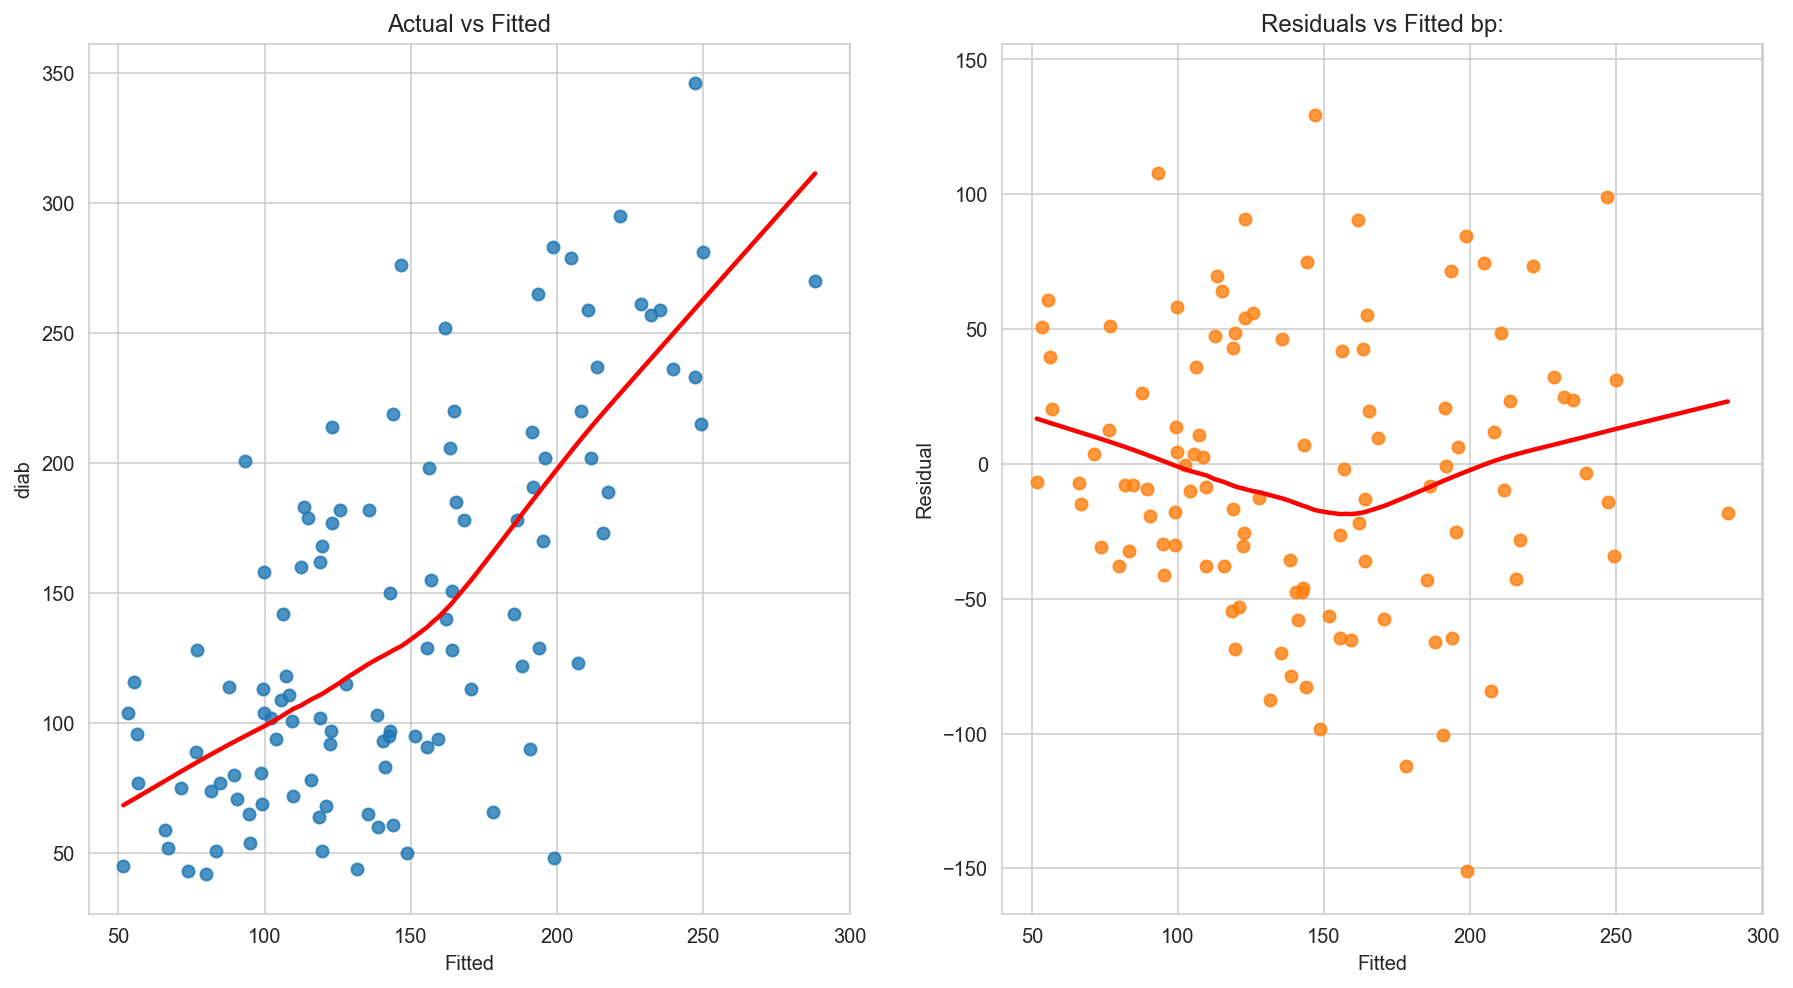

In [167]:
# Graphical Representation
from statsmodels.stats.diagnostic import het_breuschpagan

figure, axis = plt.subplots(1,2, figsize=(15,8))

# Config
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

# Actual vs Fitted
axis[0].set_title('Actual vs Fitted')
axis[0].set_xlabel('Fitted')
axis[0].set_ylabel('Actual')
sns.regplot(preds, y_test,lowess=True, line_kws={'color': 'red'}, ax = axis[0])

# Residuals vs Fitted
#bp = het_breuschpagan('Re',np.array(y_test) - np.array(preds))

axis[1].set_title('Residuals vs Fitted bp:') 
axis[1].set_xlabel('Fitted')
axis[1].set_ylabel('Residual')
sns.regplot(preds, np.array(y_test) - np.array(preds),lowess=True, line_kws={'color': 'red'}, ax = axis[1]);

### Linear Regression  W/ 5-Fold CV

In [179]:
from sklearn.model_selection import KFold #(n_splits=5, shuffle=False, random_state=None)
from sklearn.metrics import r2_score

# 5-Fold CV
kf_data = KFold(n_splits = 5, shuffle = False, random_state = 1)
kf_data.split(new_data)

# Linear Regression Model
summary = []
for train_index, test_index in kf_data.split(new_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train,y_train = X.iloc[train_index], y.iloc[train_index]
    X_test,y_test = X.iloc[test_index],y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    # Validation
    # Mean Absolute Error
    t_MAE = round(np.mean(np.abs(np.array(y_test) - np.array(preds))),3)
    
    # Root Mean Squared Error
    t_RMSE = round(np.mean((np.array(y_test) - np.array(preds)) ** 2),3)
    
    # Mean Absolute Percentage Error
    t_MAPE =  round(np.mean(np.abs(np.array(y_test) - np.array(preds))/np.array(y_test)),3)
    
    # R-squared
    t_r_squared = round(r2_score(y_test,preds),3)
    
    summary.append([t_MAE,t_RMSE,t_MAPE,t_r_squared])
    
MAE = round(np.mean(np.array(summary)[:,0]),3)
RMSE = round(np.mean(np.array(summary)[:,1]),3)
MAPE = round(np.mean(np.array(summary)[:,2]),3)
r_squared = round(np.mean(np.array(summary)[:,3]),3)

print("""
Summary
-------
MAE: {} (Mean Absolute Error)
RMSE: {} (Root Mean Squared Error)
MAPE: {} (Mean Absolute Percentage Error)
r_squared: {} (Goodness of fit)
""".format(*[MAE,RMSE,MAPE,r_squared]))


Summary
-------
MAE: 44.387 (Mean Absolute Error)
RMSE: 3017.609 (Root Mean Squared Error)
MAPE: 0.394 (Mean Absolute Percentage Error)
r_squared: 0.478 (Goodness of fit)

